<a href="https://colab.research.google.com/github/Rizkyepk/Machine_Learning-Course/blob/main/week_6/K_means_Clustering_on_Mall_Costumers_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Rizky Eka Putra Kusnady

NIM : 1103204195

Dataset : Mall_Customers.csv

Source : https://chat.openai.com/share/34dcd5d7-df12-43e0-8618-8c3c0f8383c2



In [17]:
# Mounting google colab dengan google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Exploratory


In [18]:
import pandas as pd

# Adjust the file path accordingly
file_path = '/content/drive/MyDrive/Dataset_ML/Mall_Customers.csv'

# Read the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [20]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#Pre-Processing


Drop colom Costumer Id

In [21]:
# Assuming your dataset has a column named 'Customer ID' that you want to drop
df.drop(columns=['CustomerID'], inplace=True)

# Display the first few rows of the DataFrame to verify the drop operation
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [22]:
# Assuming your dataset has a column named 'genre' that you want to rename to 'gender'
df.rename(columns={'Genre': 'Gender'}, inplace=True)

# Display the first few rows of the DataFrame to verify the rename operation
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [23]:
# Convert categorical variable 'Gendre' to numerical using one-hot encoding
# df = pd.get_dummies(df, columns=['Gender'])
df['Gender'] = df['Gender'].map({'Male':0, 'Female':1})

df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

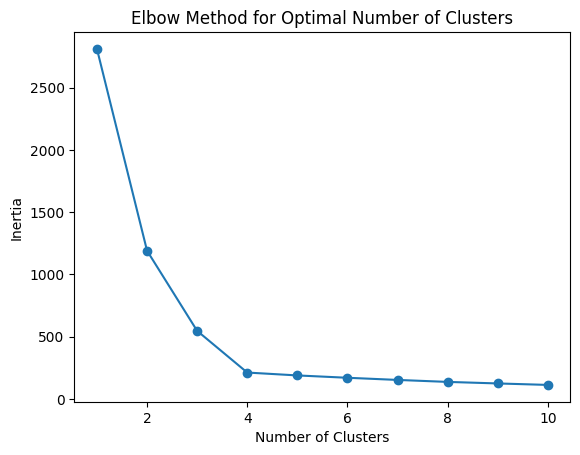

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate synthetic dataset (replace this with your own dataset)
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Calculate inertia for different number of clusters
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the inertia values
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


In [25]:
# Membuat model KMeans dengan 5 klaster
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(df)

# menambahkan label klaster ke dataframe
df['Cluster'] = kmeans.labels_

# Print pusat klaster
df

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,0,19,15,39,5
1,0,21,15,81,2
2,1,20,16,6,5
3,1,23,16,77,2
4,1,31,17,40,5
...,...,...,...,...,...
195,1,35,120,79,0
196,1,45,126,28,3
197,0,32,126,74,0
198,0,32,137,18,3


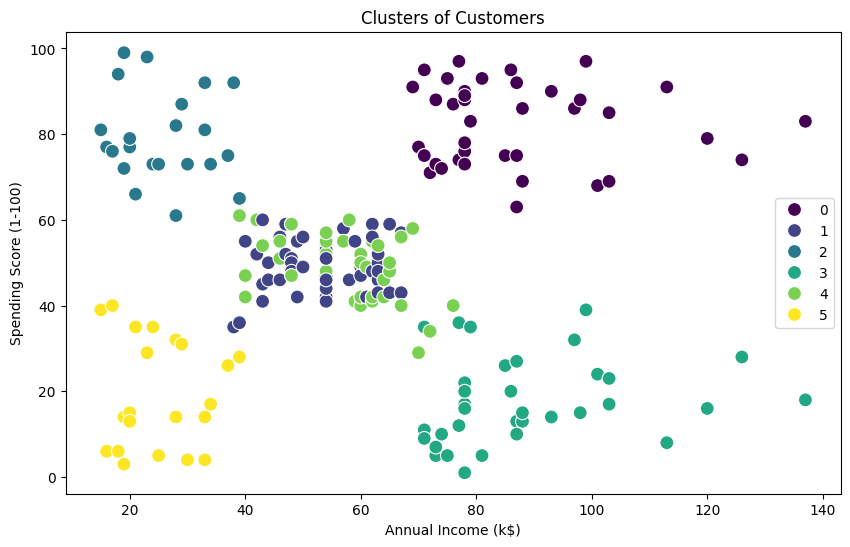

In [26]:
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# visualisasi hasil klasterisasi
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=100)

# Menambahkan label sumbu dan judul
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters of Customers')

# Menampilkan legenda
plt.legend()
plt.show()

In [27]:
from sklearn.metrics import silhouette_score

inertia = kmeans.inertia_
print('inertia:',inertia)

# Menghitung Silhouette Score
silhouette_avg = silhouette_score(df, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)


inertia: 58348.641363315044
Silhouette Score: 0.45411960908373117
